In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42) # The answer

def generate_data_2d(n, mean_val, std, r_xy):
    '''
    This function generates two pairs of correlated but randomly generated data of
    length n and returns them in a pandas dataframe where one column is named
    'indep' and the other is named 'dep'.
    Pearson's correlation coefficient between x and y is r_xy.
    
    Input:
        -n: number of data points for each dataset
        -mean_val: list of means [mean_x, mean_y]
        -std: list of standard deviations [std_x, std_y]
        -r_xy: correlation coefficient between x and y.
    
    Returns:
    Pandas dataframe with columns = ['indep','dep'] that are correlated. 
    '''
    std_d = np.diag(std)
    corr = np.asarray([[1, r_xy],[r_xy,1]])


    cov = np.dot(np.dot(std_d, corr), std_d)

    data = np.random.multivariate_normal(mean_val, cov, size = n)
    data = pd.DataFrame(data = data, columns = ['x', 'y'])
    
    return data

means = [50,80]
stds = [15,28]  
r = 0.9 
df1 = generate_data_2d(100, means, stds, r)
df2 = generate_data_2d(50, means, stds, r)



In [4]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score,\
precision_score, classification_report

np.random.seed(42)
y = np.random.choice([0,1], 100, replace = True)
x1 = np.random.choice(np.linspace(8,100, 200), 100, replace = True)
x2 = np.random.choice(np.linspace(300, 5000, 800),100, replace = True)
x3 = np.random.choice(['Hot', 'Cold'], 100, replace = True)
x4 = np.random.choice(['Ali', 'Julia', 'Eduardo'], 100, replace = True)

rand_df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})


from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


y_test = np.random.choice([0,1], 100, replace = True)
x1_test = np.random.choice(np.linspace(8,100, 200), 100, replace = True)
x2_test = np.random.choice(np.linspace(300, 5000, 800), 100,  replace = True)
x3_test = np.random.choice(['Hot', 'Cold'], 100, replace = True)
x4_test = np.random.choice(['Ali', 'Julia', 'Eduardo'], 100, replace = True)
rand_df_test = pd.DataFrame({'y':y_test, 'x1':x1_test, 'x2':x2_test, 'x3':x3_test,\
                            'x4':x4_test})

In [5]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score,\
precision_score, classification_report

np.random.seed(42)
y = np.random.choice([0,1], 100, replace = True)
x1 = np.random.choice(np.linspace(8,100, 200), 100, replace = True)
x2 = np.random.choice(np.linspace(300, 5000, 800),100, replace = True)
x3 = np.random.choice(['Hot', 'Cold'], 100, replace = True)
x4 = np.random.choice(['Ali', 'Julia', 'Eduardo'], 100, replace = True)

rand_df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})


y_test = np.random.choice([0,1], 100, replace = True)
x1_test = np.random.choice(np.linspace(8,100, 200), 100, replace = True)
x2_test = np.random.choice(np.linspace(300, 5000, 800), 100,  replace = True)
x3_test = np.random.choice(['Hot', 'Cold'], 100, replace = True)
x4_test = np.random.choice(['Ali', 'Julia', 'Eduardo'], 100, replace = True)
rand_df_test = pd.DataFrame({'y':y_test, 'x1':x1_test, 'x2':x2_test, 'x3':x3_test,\
                            'x4':x4_test})


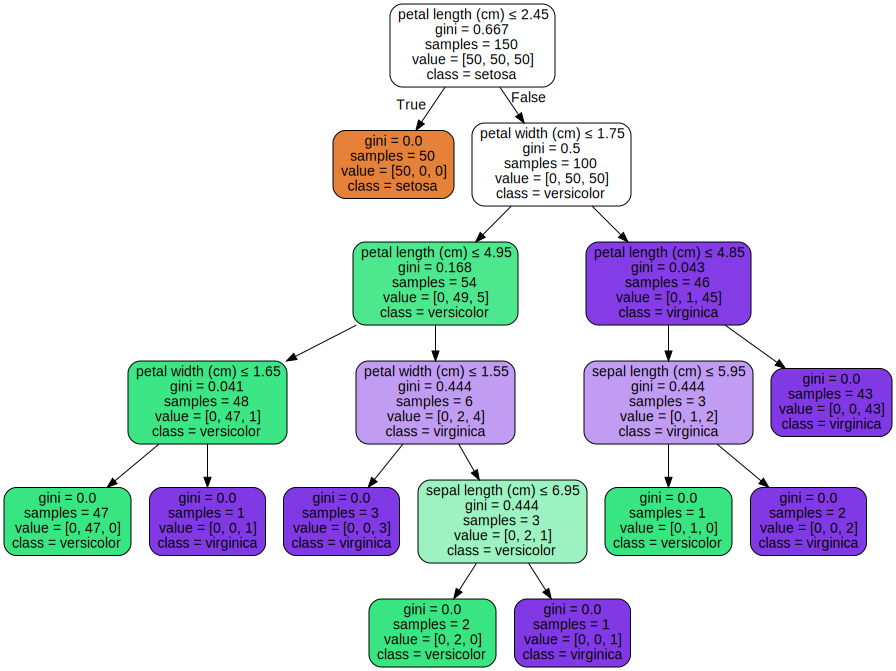

In [6]:
import graphviz 
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None) 

graph = graphviz.Source(dot_data) 

graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


CM:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0

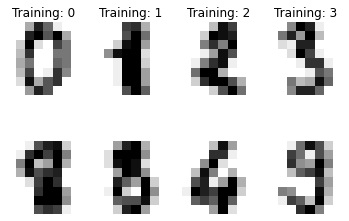

In [7]:
from sklearn import  svm, metrics
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)

classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(expected, predicted)))
print("CM:\n%s" % confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [8]:
# from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 